In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
data = './TestDataSet.csv'
demodata = pd.read_csv(data)
demodata.head()

,Company Symbol,Company Name,FDS Ticker Symbol,Sedol,Entity Country Incorp,MSCI Country,Curncy Iso,Value Traded,Market Value,Unnamed: 9,...,Net Sales.19,Net Sales.20,Net Sales.21,Net Sales.22,Net Sales.23,Net Sales.24,Net Sales.25,Net Sales.26,Net Sales.27,Net Sales.28
0,BA,Boeing Company,BA-US,2108601,United States,United States,USD,1327808000,263447.00,1,...,90762.0,90079.0,88425.0,88195.0,86623.0,85140.0,83018.0,81208.0,81698.0,78951.0
1,UTX,United Technologies Corporation,UTX-US,2915500,United States,United States,USD,323256200,164934.80,1,...,65196.0,64921.0,64190.0,63007.0,62651.0,62327.0,61901.0,59695.0,57701.0,56226.0
2,LMT,Lockheed Martin Corporation,LMT-US,2522096,United States,United States,USD,281338700,143118.00,1,...,45600.0,44603.0,44836.0,44938.0,45358.0,45924.0,46446.0,46959.0,47182.0,47294.0
3,UPS,"United Parcel Service, Inc. Class B",UPS-US,2517382,United States,United States,USD,243005600,133350.30,1,...,58258.0,57361.0,56592.0,55831.0,55491.0,55044.0,54543.0,54364.0,54064.0,53708.0
4,RTN,Raytheon Company,RTN-US,2758051,United States,United States,USD,236887500,79148.73,1,...,22826.0,22553.0,22921.0,23335.0,23706.0,24275.0,24477.0,24356.0,24417.0,24419.0


In [131]:
demo_df = pd.DataFrame(demodata)
new_df = demo_df.drop(columns = ['MSCI Country','Entity Country Incorp','Curncy Iso','Value Traded','Market Value','Unnamed: 9'])
new_df = new_df.rename(columns = {'GICS Sub Ind Name' : 'Category','FDS Ticker Symbol':'Ticker'})
new_df.head()

,Company Symbol,Company Name,Ticker,Sedol,Category,Net Sales,Net Sales.1,Net Sales.2,Net Sales.3,Net Sales.4,...,Net Sales.19,Net Sales.20,Net Sales.21,Net Sales.22,Net Sales.23,Net Sales.24,Net Sales.25,Net Sales.26,Net Sales.27,Net Sales.28
0,BA,Boeing Company,BA-US,2108601,Aerospace & Defense,86989.0,92149.0,100657.0,101127.0,98154.0,...,90762.0,90079.0,88425.0,88195.0,86623.0,85140.0,83018.0,81208.0,81698.0,78951.0
1,UTX,United Technologies Corporation,UTX-US,2915500,Aerospace & Defense,75589.0,72585.0,69639.0,66485.0,64086.0,...,65196.0,64921.0,64190.0,63007.0,62651.0,62327.0,61901.0,59695.0,57701.0,56226.0
2,LMT,Lockheed Martin Corporation,LMT-US,2522096,Aerospace & Defense,58345.0,57492.0,56463.0,53762.0,54488.0,...,45600.0,44603.0,44836.0,44938.0,45358.0,45924.0,46446.0,46959.0,47182.0,47294.0
3,UPS,"United Parcel Service, Inc. Class B",UPS-US,2517382,Air Freight & Logistics,73238.0,72426.0,71893.0,71911.0,70904.0,...,58258.0,57361.0,56592.0,55831.0,55491.0,55044.0,54543.0,54364.0,54064.0,53708.0
4,RTN,Raytheon Company,RTN-US,2758051,Aerospace & Defense,28694.0,28054.0,27520.0,27058.0,26481.0,...,22826.0,22553.0,22921.0,23335.0,23706.0,24275.0,24477.0,24356.0,24417.0,24419.0


In [99]:
list_of_companies = new_df['Company Name'].unique().tolist()

In [181]:
q0 = []
q1 = []
q2 = []
q3 = []

ind_sales = new_df.columns.get_loc("Net Sales")
growth_df = new_df.iloc[:,0:5]

for i in range(-4,21):
    col1 = ((new_df.iloc[ : , ind_sales + i + 4]/new_df.iloc[:, ind_sales + i + 8])-1).tolist()
    growth_df['Growth'+str(i+5)] = col1
    
growth_df.head()

,Company Symbol,Company Name,Ticker,Sedol,Category,Growth1,Growth2,Growth3,Growth4,Growth5,...,Growth16,Growth17,Growth18,Growth19,Growth20,Growth21,Growth22,Growth23,Growth24,Growth25
0,BA,Boeing Company,BA-US,2108601,Aerospace & Defense,-0.113750,-0.053105,0.050721,0.082823,0.074953,...,0.058967,0.076932,0.073723,0.048200,0.047782,0.058010,0.065130,0.086038,0.060283,0.078390
1,UTX,United Technologies Corporation,UTX-US,2915500,Aerospace & Defense,0.179493,0.159283,0.138022,0.111826,0.089268,...,-0.092030,-0.047103,0.000203,0.032123,0.040622,0.041619,0.036978,0.055482,0.085787,0.108509
2,LMT,Lockheed Martin Corporation,LMT-US,2522096,Aerospace & Defense,0.070786,0.098454,0.093693,0.053166,0.097155,...,0.011667,0.025604,0.012535,0.002737,0.005335,-0.028765,-0.034664,-0.043038,-0.038659,-0.028968
3,UPS,"United Parcel Service, Inc. Class B",UPS-US,2517382,Air Freight & Logistics,0.032918,0.043031,0.061857,0.092208,0.111139,...,-0.003570,0.010669,0.026753,0.045441,0.049864,0.042094,0.037567,0.026985,0.026395,0.024875
4,RTN,Raytheon Company,RTN-US,2758051,Aerospace & Defense,0.083569,0.080704,0.074370,0.067461,0.067653,...,0.018444,0.022569,-0.007330,-0.031241,-0.037121,-0.070937,-0.063570,-0.041920,-0.029119,-0.005897


In [182]:
avg_growth = growth_df.groupby('Category').mean()
avg_growth

,Growth1,Growth2,Growth3,Growth4,Growth5,Growth6,Growth7,Growth8,Growth9,Growth10,...,Growth16,Growth17,Growth18,Growth19,Growth20,Growth21,Growth22,Growth23,Growth24,Growth25
Category,,,,,,,,,,,,,,,,,,,,,
Advertising,0.038114,0.050368,0.077707,0.100416,0.091890,0.072526,0.026760,-0.006936,-0.023584,-0.029955,...,-0.000303,0.029476,0.050350,0.064111,0.078430,0.053401,0.025255,0.003186,-0.016417,-0.024297
Aerospace & Defense,0.099906,0.077016,0.086423,0.080158,0.074626,0.075115,0.059973,0.051619,0.046746,0.036008,...,0.022233,0.019775,0.017712,0.028379,0.037939,0.057227,0.060729,0.053960,0.041368,0.033245
Agricultural & Farm Machinery,-0.015940,-0.003191,0.057408,0.103777,0.138814,0.155395,0.137787,0.107207,0.066780,0.039313,...,-0.138869,-0.138072,-0.104609,-0.093956,-0.073513,-0.041225,-0.017291,0.048994,0.107550,0.129204
Agricultural Products,-0.019855,-0.035421,-0.016481,-0.005649,0.010101,0.020237,0.009638,0.025362,0.027449,0.024364,...,-0.101400,-0.035093,0.033913,0.179927,0.353936,0.262521,0.169402,0.063146,-0.003180,0.000428
Air Freight & Logistics,0.006055,0.042521,0.101568,0.150790,0.176212,0.172812,0.148910,0.121043,0.096767,0.086837,...,0.310599,0.282711,0.263655,0.339300,0.361461,0.337874,0.310520,0.235259,0.231933,0.247200
Airlines,0.039438,0.050225,0.051848,0.062935,0.070198,0.070073,0.088646,0.087221,0.074206,0.058279,...,0.023869,0.040417,0.062389,0.097978,0.119912,0.118167,0.100396,0.065912,0.049897,0.038024


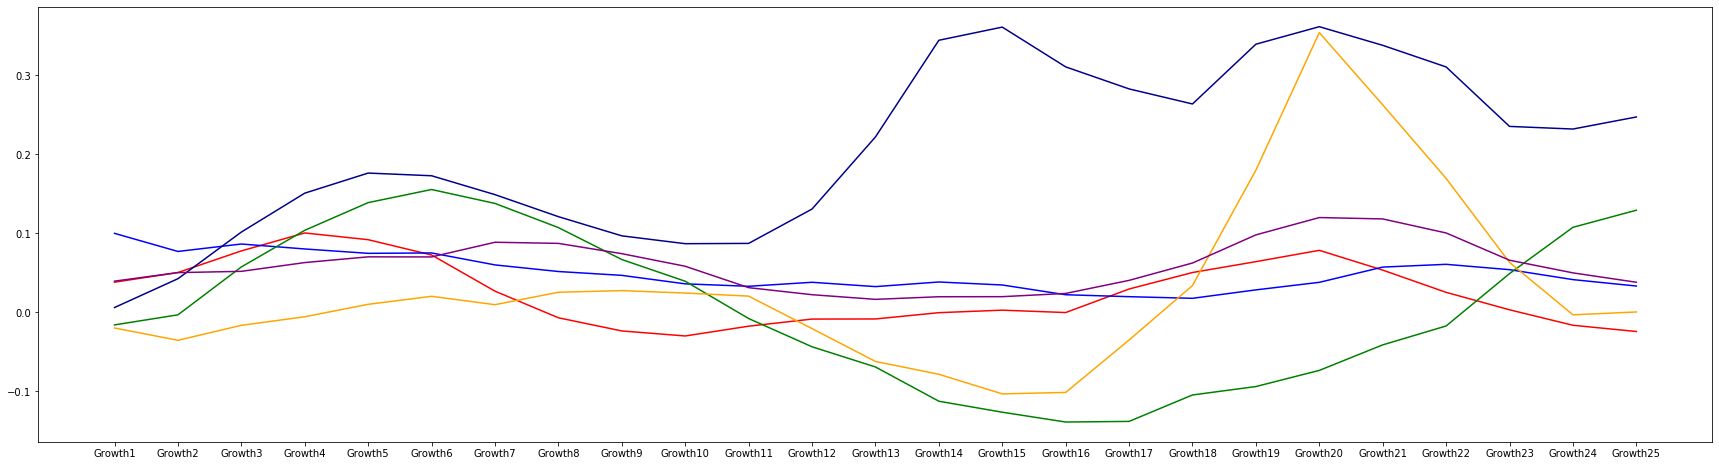

In [192]:
#x_values = avg_growth.
#x_values
plt.figure(figsize = (30,8))
plt.plot(avg_growth.iloc[0],color = 'red')
plt.plot(avg_growth.iloc[1],color = 'blue')
plt.plot(avg_growth.iloc[2],color = 'green')
plt.plot(avg_growth.iloc[3],color = 'orange')
plt.plot(avg_growth.iloc[4],color = 'darkblue')
plt.plot(avg_growth.iloc[5],color = 'purple')

#y_values = growth_df['Growth1']
#plt.scatter(x_values,y_values)
#plt.xlabel('Category')
#plt.ylabel('GrowthQ1-Q1')
#plt.show()